In [1]:
import numpy as np
import pandas as pd
from numpy import random

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import warnings # supress warnings
warnings.filterwarnings('ignore')

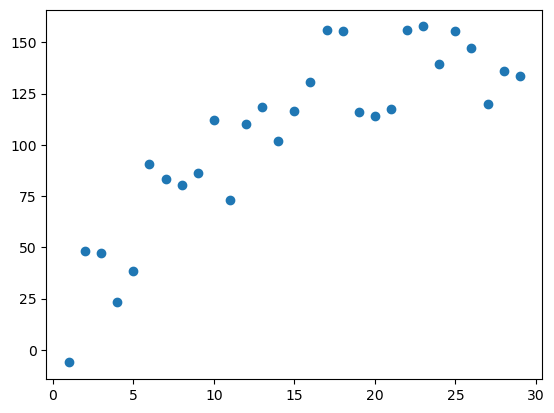

In [2]:
#create x,y arrays
x=np.arange(1,30)

y=[]

for i in range(len(x)):
    sign = random.choice([-1, 1])
    number = random.randint(30)
    y.append(10+ 10*x[i]- 0.18*x[i]**2+sign*number)

y=np.array(y)
#draw scatter plot
plt.scatter(x,y)

520.1683425853577
0.7107298250444278


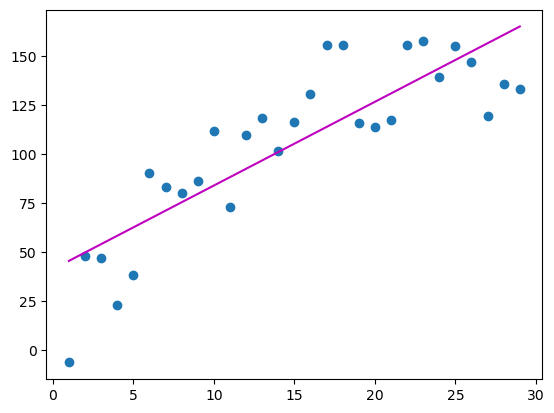

In [3]:
#linear regression
x = x.reshape(-1,1)
y = y.reshape(-1,1)

#train model
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

#plot scatterplot
plt.scatter(x,y)

#plot regression_line
plt.plot(x,y_pred, color='m')

mse=mean_squared_error(y, y_pred)
print(mse)

r2= r2_score(y, y_pred)
print(r2)

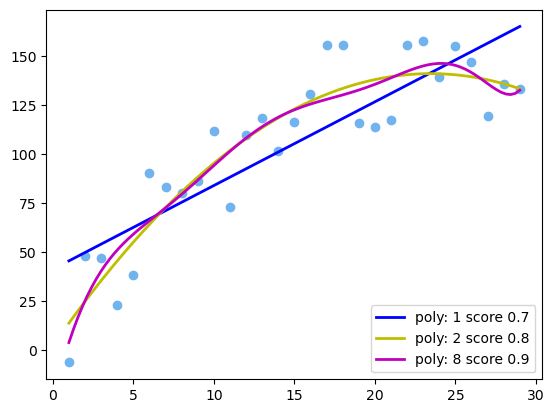

In [4]:
#train polynomial regression models with degrees: 1,2,5,8

degrees = [1,2,8]
colors=['b','y','m']

model_scores=[]
plt.scatter(x, y, color='#71b3ef')

for i in range(len(degrees)):  
    poly = PolynomialFeatures(degree=degrees[i])
    poly_features = poly.fit_transform(x.reshape(-1, 1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y)
    y_pred = poly_reg_model.predict(poly_features)
    r2= r2_score(y, y_pred)    
    
    sns.regplot(x=x,y=y_pred,order=degrees[i], scatter=False, line_kws={'color': colors[i], 'linewidth':2}, 
                ci=None, label='poly: '+str(degrees[i])+' score '+str(round(r2, 1)))
    
    
plt.legend( loc='lower right')    
plt.show()

In [20]:
# Train Test split 
x_train, x_test, y_train, y_test = train_test_split(x,y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 42)

print(len(x_train))
print(len(x_test))

20
9


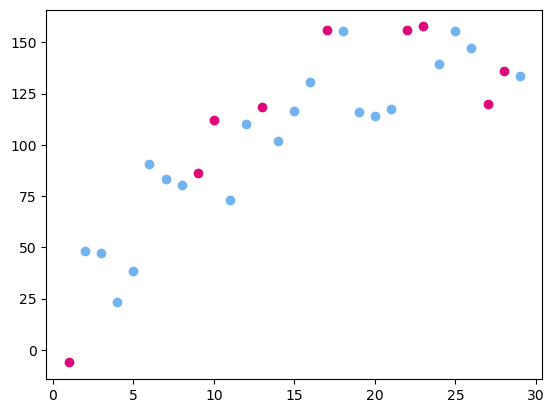

In [16]:
#plot scatter plots of train and test data
plt.scatter(x_train,y_train, color='#71b3ef')
plt.scatter(x_test,y_test, color='#e00579')

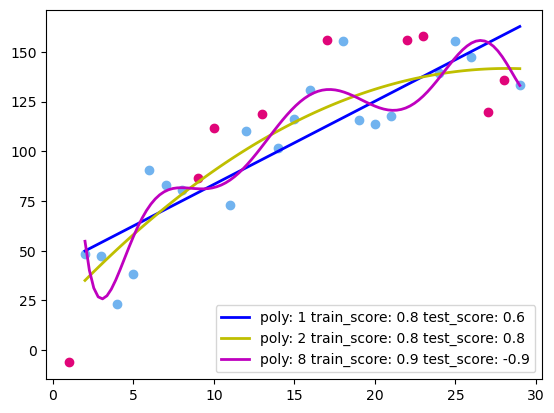

In [18]:
#train polynomial regression models with degrees: 1,2,5,8

degrees = [1,2,8]
colors=['b','y','m']

x_train=x_train.reshape(-1, 1)
y_train=y_train.reshape(-1, 1)
x_test=x_test.reshape(-1, 1)
y_test=y_test.reshape(-1, 1)

model_scores=[]
#plot scatter plots of train and test data
plt.scatter(x_train,y_train, color='#71b3ef')
plt.scatter(x_test,y_test, color='#e00579')


for i in range(len(degrees)):  
    poly = PolynomialFeatures(degree=degrees[i])
    poly_features = poly.fit_transform(x_train)
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y_train)
    
    y_pred = poly_reg_model.predict(poly_features)
    
    poly_test_features = poly.fit_transform(x_test)
    y_test_pred = poly_reg_model.predict(poly_test_features)

    
    train_score= r2_score(y_train, y_pred) 
    test_score= r2_score(y_test, y_test_pred)
    
    #train_score=poly_reg_model.score(x, y)
    
    #test_score=poly_reg_model.score(x_test,y_test)
    
    sns.regplot(x=x_train,y=y_pred, order=degrees[i], scatter=False, line_kws={'color': colors[i], 'linewidth':2}, 
                ci=None, label='poly: '+str(degrees[i])+' train_score: '+str(round(train_score, 1))
                +' test_score: '+str(round(test_score, 1)))
    
    
plt.legend( loc='lower right')    
